Expected Score Shot Map

In [1]:
import pandas as pd
from mplfooty.pitch import Pitch
import matplotlib.patheffects as pe

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 100
pd.options.display.max_columns = 999

Load Data

In [5]:
df_shots = pd.read_csv("/Users/ciaran/Documents/Projects/AFL/git-repositories/expected-score-model/data/test.csv", low_memory=False)
df_shots = df_shots[df_shots['Shot_At_Goal'] == True]
df_shots.head()

,Chain_Number,Initial_State,Final_State,Order,Quarter,Quarter_Duration_Chain_Start,Quarter_Duration,Team_Chain,Team,Player,AFL_API_Player_ID,Description,x,y,Disposal,Shot_At_Goal,Behind_Detail,Venue_Width,Venue_Length,Home_Team,Away_Team,Home_Team_Direction_Q1,Match_ID,Round_ID,Year,Season,Goal,Behind,Miss,Score,Event_Type1,ballUp,centreBounce,kickIn,possGain,throwIn,Event_Type0,Event_Type2,Event_Type3,x0,x1,x2,x3,y0,y1,y2,y3,Quarter_Duration0,Quarter_Duration1,Quarter_Duration2,Quarter_Duration3,Time_Since_Last_Action,Distance_Since_Last_Action,Chain_Duration,Distance_to_Right_Goal_x,Distance_to_Middle_y,Distance_to_Middle_Goal,Angle_to_Middle_Goal,Angle_to_Middle_Goal_degrees,Visible_Goal_Angle,Visible_Goal_Angle_degrees,Visible_Behind_Angle,Visible_Behind_Angle_degrees,Squared_Distance_to_Middle_Goal,Log_Distance_to_Middle_Goal,xGoals,xBehinds,xMiss,xGoals_normalised,xBehinds_normalised,xMiss_normalised,xScore
10,1,centreBounce,goal,11.0,1,13,39.0,Brisbane Lions,Brisbane Lions,Zac Bailey,Zac_Bailey,Kick,26.0,-21.0,effective,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021.0,NaN,1,0,0,6,Handball Received,False,True,False,False,False,Kick,Handball,Gather from Opposition,26.0,18.0,11.0,6.0,-21.0,-23.0,-26.0,-27.0,39.0,38.0,37.0,36.0,1.0,8.246211,26.0,52.0,21.0,56.080300,0.383818,21.991130,0.106164,6.082774,0.327040,18.737997,2704.0,3.951244,0.327113,0.412663,0.155189,0.365504,0.461094,0.173402,2.654117
60,6,possGain,goal,61.0,1,149,168.0,Brisbane Lions,Brisbane Lions,Zac Bailey,Zac_Bailey,Kick,35.0,19.0,effective,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021.0,NaN,1,0,0,6,Handball Received,False,False,False,True,False,Kick,Handball,Loose Ball Get,35.0,28.0,25.0,22.0,19.0,19.0,26.0,29.0,168.0,167.0,165.0,165.0,1.0,7.000000,19.0,43.0,19.0,47.010637,0.416065,23.838740,0.125105,7.167963,0.389831,22.335680,1849.0,3.761200,0.381940,0.360482,0.218915,0.397301,0.374980,0.227719,2.758785
109,10,possGain,goal,110.0,1,285,306.0,Brisbane Lions,Brisbane Lions,Joe Daniher,Joe_Daniher,Kick,50.0,24.0,effective,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021.0,NaN,1,0,0,6,Gather,False,False,False,True,False,Kick,Kick Inside 50 Result,Kick Into F50,50.0,50.0,50.0,-8.0,24.0,28.0,28.0,44.0,306.0,305.0,304.0,303.0,1.0,4.000000,21.0,28.0,24.0,36.878178,0.708626,40.601295,0.132764,7.606837,0.424028,24.295030,784.0,3.332205,0.348274,0.373314,0.354628,0.323610,0.346876,0.329514,2.288536
182,17,kickIn,behind,183.0,1,520,582.0,Sydney,Sydney,Isaac Heeney,Isaac_Heeney,Kick,46.0,-41.0,ineffective,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021.0,NaN,0,1,0,1,Mark On Lead,False,False,True,False,False,Kick,Kick Inside 50 Result,Kick Into F50,46.0,49.0,49.0,19.0,-41.0,-35.0,-35.0,-49.0,582.0,550.0,548.0,548.0,32.0,6.708204,62.0,32.0,41.0,52.009614,0.908067,52.028396,0.075999,4.354442,0.235146,13.472898,1024.0,3.465736,0.278716,0.406007,0.320444,0.277283,0.403920,0.318797,2.067619
221,21,possGain,goal,222.0,1,653,666.0,Sydney,Sydney,Logan McDonald,Logan_McDonald,Kick,34.0,15.0,effective,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021.0,NaN,1,0,0,6,Handball Received,False,False,False,True,False,Kick,Handball,Handball Received,34.0,19.0,10.0,7.0,15.0,17.0,20.0,20.0,666.0,664.0,662.0,662.0,2.0,15.132746,13.0,44.0,15.0,46.486557,0.328553,18.824710,0.130930,7.501763,0.408345,23.396432,1936.0,3.784190,0.350268,0.380724,0.186880,0.381609,0.414790,0.203601,2.704443


In [6]:
df_shots[['Score', 'xScore']].sum()

Score     102268.000000
xScore    102302.229354
dtype: float64

In [7]:
df_shots[['Score', 'xScore']].describe()

,Score,xScore
count,31161.000000,31161.000000
mean,3.281923,3.283021
std,2.682506,1.064788
min,0.000000,1.108884
25%,1.000000,2.443665
50%,1.000000,3.064789
75%,6.000000,4.049906
max,6.000000,5.897808


Plot Expected Score per Match

In [165]:
def get_venue_dimensions(chain_data, match_id):
    
    # Get match chain information
    match = chain_data[chain_data['Match_ID'] == match_id]

    return list(set(match['Venue_Length']))[0], list(set(match['Venue_Width']))[0]

In [166]:
def get_teams(chain_data, match_id):
    
    # Get match chain information
    match = chain_data[chain_data['Match_ID'] == match_id]
 
    # Get teams
    home_team = list(set(match['Home_Team']))[0]
    away_team = list(set(match['Away_Team']))[0]
    
    return home_team, away_team

In [167]:
def get_match_shots(chain_data, match_id, team):
    
    # Get match chain information
    match = chain_data[chain_data['Match_ID'] == match_id]
    
    # Filter Shots
    shots = match[match['Shot_At_Goal'] == True]
    team_shots = shots[shots['Team'] == team]
    
    # Home direction (attacking right)
    home_team = list(set(match['Home_Team']))[0]
    if (team != home_team):
        x = team_shots['x']
        y = team_shots['y']
    else:
        x = -1*team_shots['x']
        y = -1*team_shots['y']
    
    return x, y

In [168]:
def get_match_score(chain_data, match_id, team):
    # Get match chain information
    match = chain_data[chain_data['Match_ID'] == match_id]
    
    # Filter Shots
    shots = match[match['Shot_At_Goal'] == True]
    team_shots = shots[shots['Team'] == team]
    
    score = team_shots['Score']
    
    return score

In [169]:
def get_match_expected_score(chain_data, match_id, team):
    # Get match chain information
    match = chain_data[chain_data['Match_ID'] == match_id]
    
    # Filter Shots
    shots = match[match['Shot_At_Goal'] == True]
    team_shots = shots[shots['Team'] == team]
    
    expected_score = team_shots['xScore']
    
    return expected_score

Text(0, 39.0, '90 - 122')

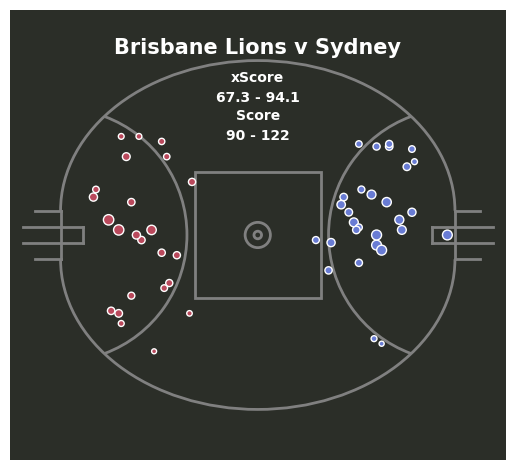

In [170]:
match_id = "202101_BrisbaneLions_Sydney"
pitch_length, pitch_width = get_venue_dimensions(df_shots, match_id)
home_team, away_team = get_teams(df_shots, match_id)
home_x, home_y = get_match_shots(df_shots, match_id, team=home_team)
home_score = get_match_score(df_shots, match_id, team=home_team)
home_expected_score = get_match_expected_score(df_shots, match_id, team=home_team)
away_x, away_y = get_match_shots(df_shots, match_id, team=away_team)
away_score = get_match_score(df_shots, match_id, team=away_team)
away_expected_score = get_match_expected_score(df_shots, match_id, team=away_team)

size_ratio = 10

pitch = Pitch(pitch_width=pitch_width, pitch_length=pitch_length, line_colour="grey")
fig, ax = pitch.draw()
ax.set_facecolor("#2b2e28")
pitch.scatter(home_x, home_y, ax=ax, ec="white", color = "#ba495c", s=home_expected_score*size_ratio)
pitch.scatter(away_x, away_y, ax=ax, ec="white", color = "#697cd4", s=away_expected_score*size_ratio)

ax.text(x=0, y=pitch_width/2+5, s=f'{home_team} v {away_team}', ha="center", va="center", color = "white", fontweight="bold", fontsize = 15)
ax.text(0, pitch_width/2-7, s='xScore', ha="center", va="center", color = "white", fontweight="bold")
ax.text(0, pitch_width/2-15, s=f'{home_expected_score.sum().round(1)} - {away_expected_score.sum().round(1)}', ha="center", va="center", color = "white", fontweight="bold")
ax.text(0, pitch_width/2-22, s='Score', ha="center", va="center", color = "white", fontweight="bold")
ax.text(0, pitch_width/2-30, s=f'{home_score.sum()} - {away_score.sum()}', ha="center", va="center", color = "white", fontweight="bold")

In [171]:
def plot_match_expected_score(df_shots, match_id):
    
    pitch_length, pitch_width = get_venue_dimensions(df_shots, match_id)
    home_team, away_team = get_teams(df_shots, match_id)
    home_x, home_y = get_match_shots(df_shots, match_id, team=home_team)
    home_score = get_match_score(df_shots, match_id, team=home_team)
    home_expected_score = get_match_expected_score(df_shots, match_id, team=home_team)
    away_x, away_y = get_match_shots(df_shots, match_id, team=away_team)
    away_score = get_match_score(df_shots, match_id, team=away_team)
    away_expected_score = get_match_expected_score(df_shots, match_id, team=away_team)

    size_ratio = 10

    pitch = Pitch(pitch_width=pitch_width, pitch_length=pitch_length, line_colour="grey")
    fig, ax = pitch.draw()
    ax.set_facecolor("#2b2e28")
    pitch.scatter(home_x, home_y, ax=ax, ec="white", color = "#ba495c", s=home_expected_score*size_ratio)
    pitch.scatter(away_x, away_y, ax=ax, ec="white", color = "#697cd4", s=away_expected_score*size_ratio)

    ax.text(x=0, y=pitch_width/2+5, s=f'{home_team} v {away_team}', ha="center", va="center", color = "white", fontweight="bold", fontsize = 15)
    ax.text(0, pitch_width/2-7, s='xScore', ha="center", va="center", color = "white", fontweight="bold")
    ax.text(0, pitch_width/2-15, s=f'{home_expected_score.sum().round(1)} - {away_expected_score.sum().round(1)}', ha="center", va="center", color = "white", fontweight="bold")
    ax.text(0, pitch_width/2-22, s='Score', ha="center", va="center", color = "white", fontweight="bold")
    ax.text(0, pitch_width/2-30, s=f'{home_score.sum()} - {away_score.sum()}', ha="center", va="center", color = "white", fontweight="bold")
    return fig, ax


(<Figure size 640x480 with 1 Axes>, <Axes: >)

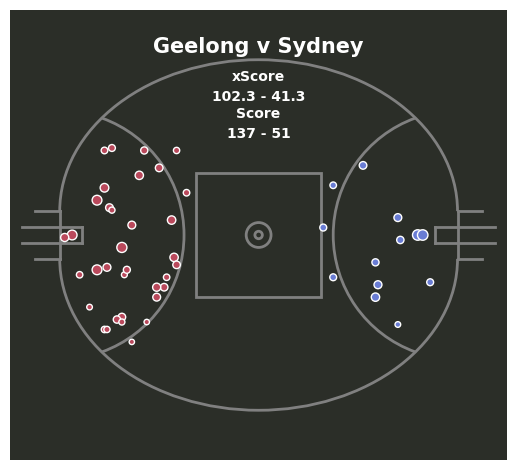

In [172]:
plot_match_expected_score(df_shots, match_id="2022F4_Geelong_Sydney")

(<Figure size 640x480 with 1 Axes>, <Axes: >)

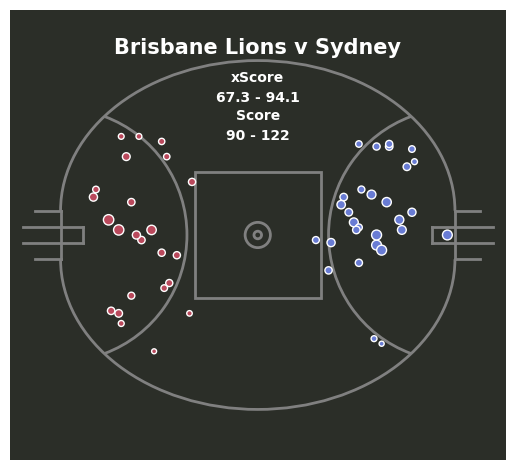

In [173]:
plot_match_expected_score(df_shots, match_id="202101_BrisbaneLions_Sydney")

Plot Expected Score per Player - NEED TO STANDARDISE X,Y COORDINATES

In [162]:
player = "Jeremy Cameron"

In [187]:
def get_player_shots(chain_data, player, shot_type="all"):
    
    # Get match chain information
    player_data = chain_data[chain_data['Player'] == player]
    
    # Filter Shots
    shots = player_data[player_data['Shot_At_Goal'] == True]
    
    if shot_type == "set":
        shots = shots[shots['Set_Shot'] == True]
    if shot_type == "open":
        shots = shots[shots['Set_Shot'] == False]  
        
    return shots['x'], shots['y']

In [188]:
def get_player_score(chain_data, player, shot_type="all"):
    # Get match chain information
    player_data = chain_data[chain_data['Player'] == player]
    
    # Filter Shots
    shots = player_data[player_data['Shot_At_Goal'] == True]
    
    if shot_type == "set":
        shots = shots[shots['Set_Shot'] == True]
    if shot_type == "open":
        shots = shots[shots['Set_Shot'] == False]  
    
    return shots['Score']

In [189]:
def get_player_expected_score(chain_data, player, shot_type="all"):
    # Get match chain information
    player_data = chain_data[chain_data['Player'] == player]
    
    # Filter Shots
    shots = player_data[player_data['Shot_At_Goal'] == True]
    
    if shot_type == "set":
        shots = shots[shots['Set_Shot'] == True]
    if shot_type == "open":
        shots = shots[shots['Set_Shot'] == False]        
    
    return shots['xScore']

In [190]:
df_shots.tail()

,Chain_Number,Initial_State,Final_State,Order,Quarter,Quarter_Duration_Chain_Start,Quarter_Duration,Team_Chain,Team,Player,AFL_API_Player_ID,Description,x,y,Disposal,Shot_At_Goal,Behind_Detail,Venue_Width,Venue_Length,Home_Team,Away_Team,Home_Team_Direction_Q1,Match_ID,Round_ID,Year,Goal,Behind,Miss,Score,Home_Score,Away_Score,Home_Current_Score,Away_Current_Score,Current_Margin,Event_Type0,Event_Type1,Event_Type2,Event_Type3,x0,x1,x2,x3,y0,y1,y2,y3,Quarter_Duration0,Quarter_Duration1,Quarter_Duration2,Quarter_Duration3,Chain_Duration,Time_Since_Last_Action,Distance_Since_Last_Action,Distance_to_Right_Goal_x,Distance_to_Middle_y,Distance_to_Middle_Goal,Angle_to_Middle_Goal,Angle_to_Middle_Goal_degrees,Visible_Goal_Angle,Visible_Goal_Angle_degrees,Visible_Behind_Angle,Visible_Behind_Angle_degrees,Squared_Distance_to_Middle_Goal,Log_Distance_to_Middle_Goal,Set_Shot,random100,ModellingFilter,ballUp,centreBounce,kickIn,possGain,throwIn,xGoals,xBehinds,xMiss,xGoals_normalised,xBehinds_normalised,xMiss_normalised,xScore
20268,218,possGain,goal,1837.0,4,1136,1198.0,Geelong,Geelong,Sam De Koning,Sam_De_Koning,Kick,78.0,1.0,effective,True,NaN,141,160,Geelong,Sydney,left,2022F4_Geelong_Sydney,2022F4,2022,1,0,0,6,6,0,119.0,39.0,80.0,Kick,Gather,Kick,Handball Received,78.0,78.0,65.0,64.0,1.0,1.0,-12.0,-9.0,1198.0,1193.0,1190.0,1188.0,62.0,5.0,0.000000,2.0,1.0,2.236068,0.463648,26.565051,-2.442748,-139.959156,-0.440569,-25.242748,4.0,0.693147,False,5,True,0,0,0,1,0,0.327006,0.197288,0.106594,0.518326,0.312715,0.168959,3.422673
20269,219,centreBounce,goal,1846.0,4,1252,1266.0,Sydney,Sydney,Chad Warner,Chad_Warner,Kick,26.0,3.0,effective,True,NaN,141,160,Geelong,Sydney,left,2022F4_Geelong_Sydney,2022F4,2022,1,0,0,6,0,6,125.0,39.0,86.0,Kick,Uncontested Mark,Ground Kick,Handball,26.0,18.0,-5.0,-2.0,3.0,2.0,-4.0,3.0,1266.0,1265.0,1264.0,1260.0,14.0,1.0,8.062258,54.0,3.0,54.083269,0.055499,3.179830,0.118569,6.793500,0.365993,20.969862,2916.0,3.988984,True,53,True,0,1,0,0,0,0.320779,0.368090,0.226259,0.350529,0.402228,0.247244,2.505400
20270,227,throwIn,goal,1901.0,4,1452,1458.0,Geelong,Geelong,Joel Selwood,Joel_Selwood,Kick,37.0,17.0,effective,True,NaN,141,160,Geelong,Sydney,left,2022F4_Geelong_Sydney,2022F4,2022,1,0,0,6,6,0,125.0,45.0,80.0,Kick,Gather,Knock On,Handball,37.0,37.0,43.0,34.0,17.0,19.0,20.0,25.0,1458.0,1457.0,1455.0,1453.0,6.0,1.0,2.000000,43.0,17.0,46.238512,0.376490,21.571307,0.129338,7.410516,0.403551,23.121747,1849.0,3.761200,False,88,False,0,0,0,0,1,0.267303,0.513675,0.201152,0.272167,0.523021,0.204812,2.156020
20271,228,centreBounce,goal,1912.0,4,1519,1560.0,Geelong,Geelong,Jeremy Cameron,Jeremy_Cameron,Kick,41.0,21.0,effective,True,NaN,141,160,Geelong,Sydney,left,2022F4_Geelong_Sydney,2022F4,2022,1,0,0,6,6,0,131.0,45.0,86.0,Kick,Mark On Lead,Kick Inside 50 Result,Kick Into F50,41.0,49.0,49.0,25.0,21.0,17.0,17.0,33.0,1560.0,1535.0,1532.0,1531.0,41.0,25.0,8.944272,39.0,21.0,44.294469,0.493941,28.300756,0.127885,7.327246,0.400462,22.944787,1521.0,3.663562,True,66,True,0,1,0,0,0,0.503041,0.413773,0.086015,0.501622,0.412606,0.085772,3.422337
20272,233,possGain,goal,1971.0,4,1744,1753.0,Sydney,Sydney,Tom Papley,Tom_Papley,Kick,48.0,-20.0,effective,True,NaN,141,160,Geelong,Sydney,left,2022F4_Geelong_Sydney,2022F4,2022,1,0,0,6,0,6,137.0,45.0,92.0,Kick,Bounce,Handball Received,Handball,48.0,38.0,35.0,37.0,-20.0,-31.0,-33.0,-37.0,1753.0,1752.0,1748.0,1747.0,9.0,1.0,14.866069,32.0,20.0,37.735925,0.558599,32.005383,0.144862,8.299977,0.461317,26.431498,1024.0,3.465736,False,23,True,0,0,0,1,0,0.575621,0.403913,0.197785,0.488925,0.343079,0.167996,3.276630


In [192]:
def plot_player_expected_score(df_shots, player, shot_type="all"):
    
    # pitch_length, pitch_width = get_venue_dimensions(df_shots, match_id)
    player_x, player_y = get_player_shots(df_shots, player, shot_type)
    player_score = get_player_score(df_shots, player, shot_type)
    player_expected_score = get_player_expected_score(df_shots, player, shot_type)

    size_ratio = 10

    pitch = Pitch(pitch_width=pitch_width, pitch_length=pitch_length, line_colour="grey")
    fig, ax = pitch.draw()
    ax.set_facecolor("#2b2e28")
    pitch.scatter(player_x, player_y, ax=ax, ec="white", color = "#ba495c", s=player_expected_score*size_ratio)

    ax.text(x=0, y=pitch_width/2+5, s=f'{player} - {shot_type}', ha="center", va="center", color = "white", fontweight="bold", fontsize = 15)
    ax.text(0, pitch_width/2-7, s='xScore', ha="center", va="center", color = "white", fontweight="bold")
    ax.text(0, pitch_width/2-15, s=f'{player_expected_score.sum().round(1)}', ha="center", va="center", color = "white", fontweight="bold")
    ax.text(0, pitch_width/2-22, s='Score', ha="center", va="center", color = "white", fontweight="bold")
    ax.text(0, pitch_width/2-30, s=f'{player_score.sum()}', ha="center", va="center", color = "white", fontweight="bold")
    return fig, ax


(<Figure size 640x480 with 1 Axes>, <Axes: >)

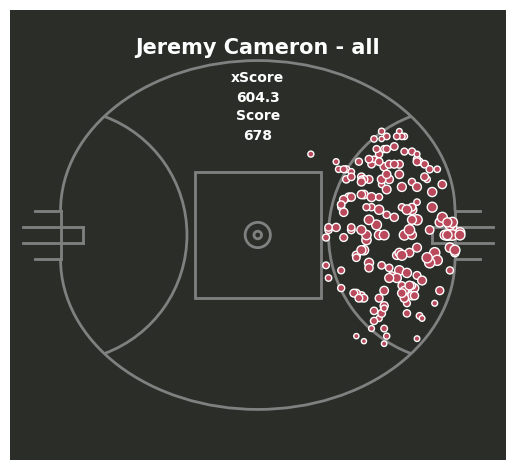

In [197]:
plot_player_expected_score(df_shots, player, shot_type="all")

(<Figure size 640x480 with 1 Axes>, <Axes: >)

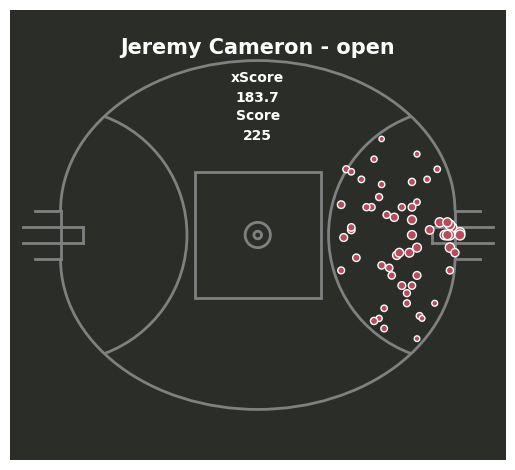

In [199]:
plot_player_expected_score(df_shots, player, shot_type="open")

(<Figure size 640x480 with 1 Axes>, <Axes: >)

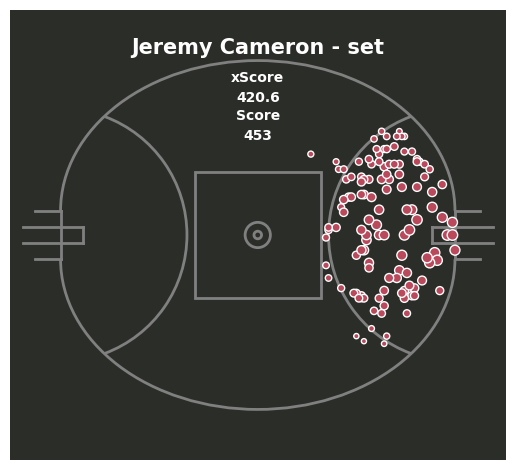

In [200]:
plot_player_expected_score(df_shots, player, shot_type="set")

Plot Expected Score per Team